# Imports

In [41]:
import numpy as np
import pandas as pd
import math

#GRÁFICOS
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
from scipy.stats import shapiro, ttest_ind

from sklearn.experimental import enable_halving_search_cv 

from sklearn.model_selection import (train_test_split, 
                                     cross_val_score,
                                     cross_validate,
                                    RepeatedStratifiedKFold,
                                     StratifiedKFold,
                                     learning_curve,
                                     HalvingGridSearchCV,
                                     GridSearchCV)

from sklearn.preprocessing import (FunctionTransformer, 
                                   StandardScaler,
                                   MaxAbsScaler,
                                   MinMaxScaler,
                                  PolynomialFeatures)

from sklearn.compose import ColumnTransformer

#MODELOS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import          SVC, NuSVC
from sklearn.tree import        (DecisionTreeClassifier, 
                                 ExtraTreeClassifier)
from sklearn.ensemble import    (RandomForestClassifier, 
                                 AdaBoostClassifier)
from sklearn.neighbors import    KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


from sklearn.pipeline import Pipeline

from sklearn.metrics import (precision_score, 
                             f1_score,
                             confusion_matrix, 
                             plot_confusion_matrix, 
                             roc_auc_score, 
                             plot_roc_curve,
                             average_precision_score, 
                             accuracy_score,
                             SCORERS)

from sklearn.impute import (SimpleImputer, 
                            KNNImputer)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline


import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
water = pd.read_csv('water_potability.csv')

## Sobre o Dataset

Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. **pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. **Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. **Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Análise Exploratória 

In [4]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


* O dataset conta apenas com características físico químicas da água e não apresenta características microbiológicas das amostras.
* Não há variáveis categóricas

In [6]:
round(water.describe(),2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.00,3276.00,3276.00,3276.00,2495.00,3276.00,3276.00,3114.00,3276.00,3276.00
mean,7.08,196.37,22014.09,7.12,333.78,426.21,14.28,66.40,3.97,0.39
std,1.59,32.88,8768.57,1.58,41.42,80.82,3.31,16.18,0.78,0.49
min,0.00,47.43,320.94,0.35,129.00,181.48,2.20,0.74,1.45,0.00
25%,6.09,176.85,15666.69,6.13,307.70,365.73,12.07,55.84,3.44,0.00
50%,7.04,196.97,20927.83,7.13,333.07,421.88,14.22,66.62,3.96,0.00
75%,8.06,216.67,27332.76,8.11,359.95,481.79,16.56,77.34,4.50,1.00
max,14.00,323.12,61227.20,13.13,481.03,753.34,28.30,124.00,6.74,1.00


In [7]:
potavel = water[water.Potability == 1]
npotavel = water[water.Potability == 0]

ph: Semelhantes. P = 0.8527810477031476 de pertencerem à mesma população
Hardness: Semelhantes. P = 0.42854158740864634 de pertencerem à mesma população
*Solids: NÃO semelhantes. P = 0.053463638184504905 de pertencerem à mesma população
Chloramines: Semelhantes. P = 0.17361022465074671 de pertencerem à mesma população
Sulfate: Semelhantes. P = 0.5136057296086569 de pertencerem à mesma população
Conductivity: Semelhantes. P = 0.6418845485973537 de pertencerem à mesma população
*Organic_carbon: NÃO semelhantes. P = 0.08599746163873828 de pertencerem à mesma população
Trihalomethanes: Semelhantes. P = 0.2442428751638444 de pertencerem à mesma população
Turbidity: Semelhantes. P = 0.9279391620838058 de pertencerem à mesma população


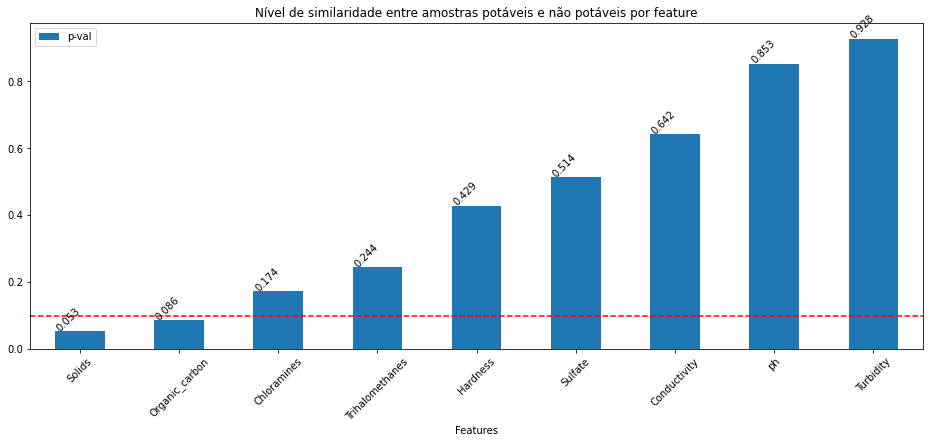

In [8]:
def group_similarities():
    ttests = []
    for col in water.drop('Potability', axis = 1).columns:

        potavel.fillna(value = potavel[col].mean(), inplace = True)
        npotavel.fillna(value = potavel[col].mean(), inplace = True)
        ttest = ttest_ind(potavel[col], npotavel[col])
        ttests.append([col, ttest[1]])

        if ttest[1] > 0.1:
            print(f'{col}: Semelhantes. P = {ttest[1]} de pertencerem à mesma população')
        else:
            print(f'*{col}: NÃO semelhantes. P = {ttest[1]} de pertencerem à mesma população')
    imp  = pd.DataFrame(ttests, columns = ['Features','p-val']).sort_values(by='p-val', ascending = True).set_index('Features')

    ax = imp.plot(kind='bar', figsize = (16,6))
    for i in ax.patches:
        ax.text(x=i.get_x(), y=i.get_height(), s=round(i.get_height(),3), rotation=45)
    
    plt.axhline(y=0.1, color = 'red', linestyle = '--')
    plt.xticks(rotation = 45)
    plt.title('Nível de similaridade entre amostras potáveis e não potáveis por feature')

group_similarities()


Os valores que mais distoam entre amostras potáveis e não potáveis são Sólidos Dissolvidos Totais(TDS) e carbono organico Total (TOC)

## Valores faltantes 

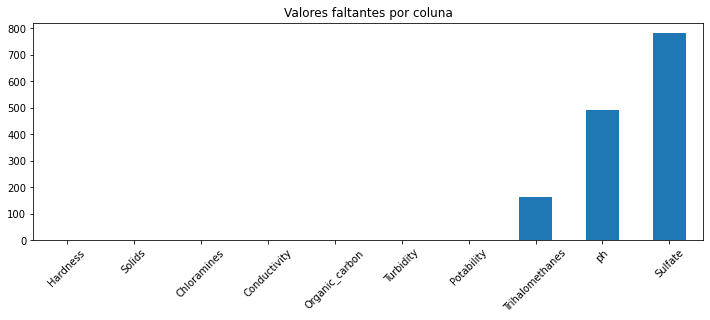

In [9]:
water.isna().sum().sort_values().plot(kind = 'bar', figsize=(12,4))
plt.title('Valores faltantes por coluna')
plt.xticks(rotation = 45)
plt.show()

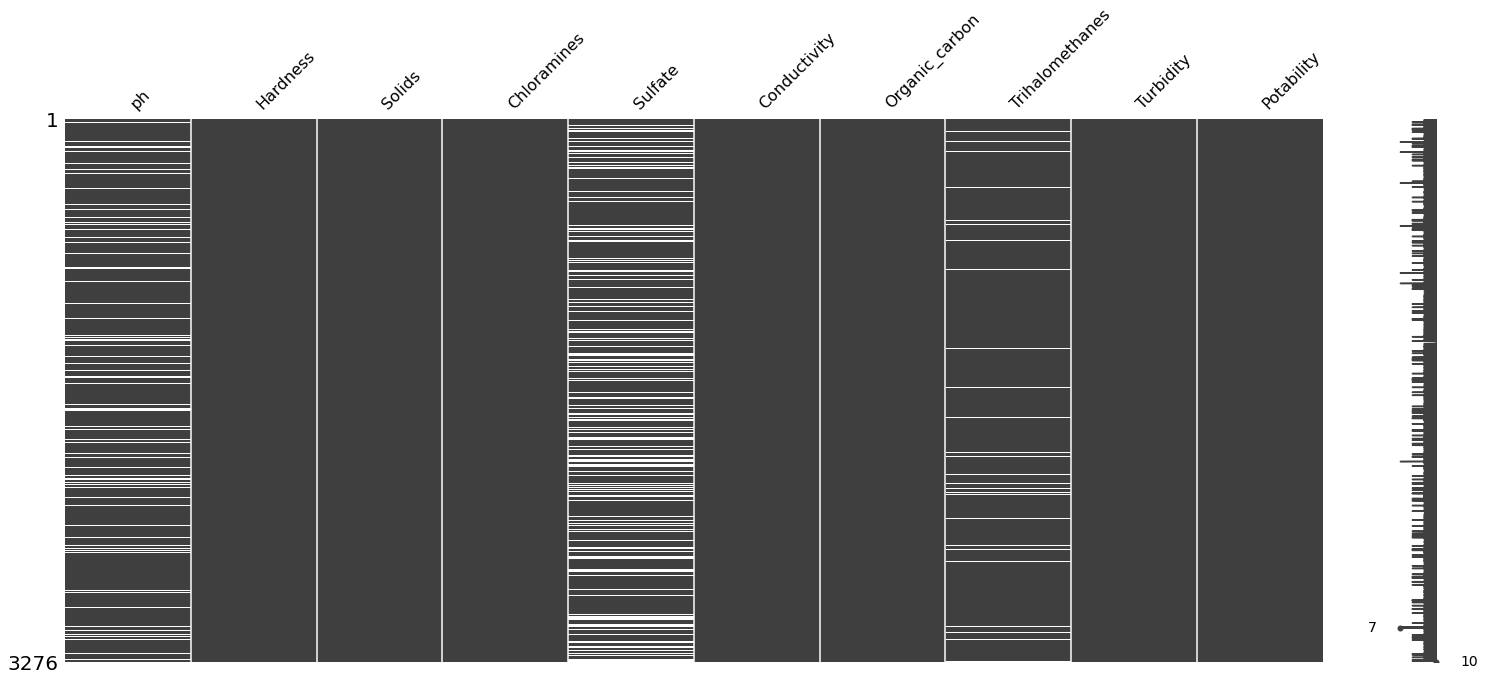

In [10]:
ms.matrix(water)
plt.show()

Verificando de há valores missing nas 3 colunas com valores faltantes simultaneamente.

In [11]:
# % de valores faltantes por feature
round(water.isna().sum().sort_values(ascending = False)/len(water), 2)

Sulfate            0.24
ph                 0.15
Trihalomethanes    0.05
Hardness           0.00
Solids             0.00
Chloramines        0.00
Conductivity       0.00
Organic_carbon     0.00
Turbidity          0.00
Potability         0.00
dtype: float64

In [12]:
all_missing = len(water[(water.ph.isna()) & (water.Sulfate.isna()) & (water.Trihalomethanes.isna())])
any_missing = len(water[(water.ph.isna()) | (water.Sulfate.isna()) | (water.Trihalomethanes.isna())])
print(f'Valores Missing em pH Sulfatos e Trihalometanos: {all_missing} pct: {round(all_missing/len(water)*100,2)}%\n\
Registros com valores faltantes em alguma das features: {any_missing} pct: {round(any_missing/len(water)*100,2)}%')

Valores Missing em pH Sulfatos e Trihalometanos: 9 pct: 0.27%
Registros com valores faltantes em alguma das features: 1265 pct: 38.61%


## Valores duplicados

In [13]:
water.duplicated().sum()

0

Não há duplicatas no dataset.

## Análise Univariada

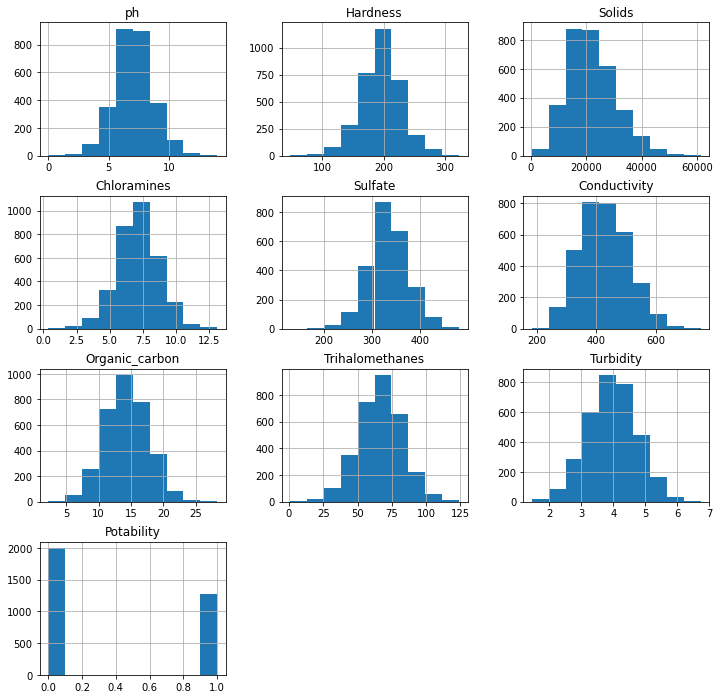

In [14]:
water.hist(figsize=(12,12))
plt.show()

A maior parte das features apresenta uma distribuição semelhante à distribuição normal.

In [15]:
water.Potability.value_counts(normalize = True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

* Razão de 2/3 para água potável.
* A maior parte dos corpos d'água coletados é não potável. Considerar balanceamento entre as classes na modelagem.

## Análise multivariada

<Figure size 1152x720 with 0 Axes>

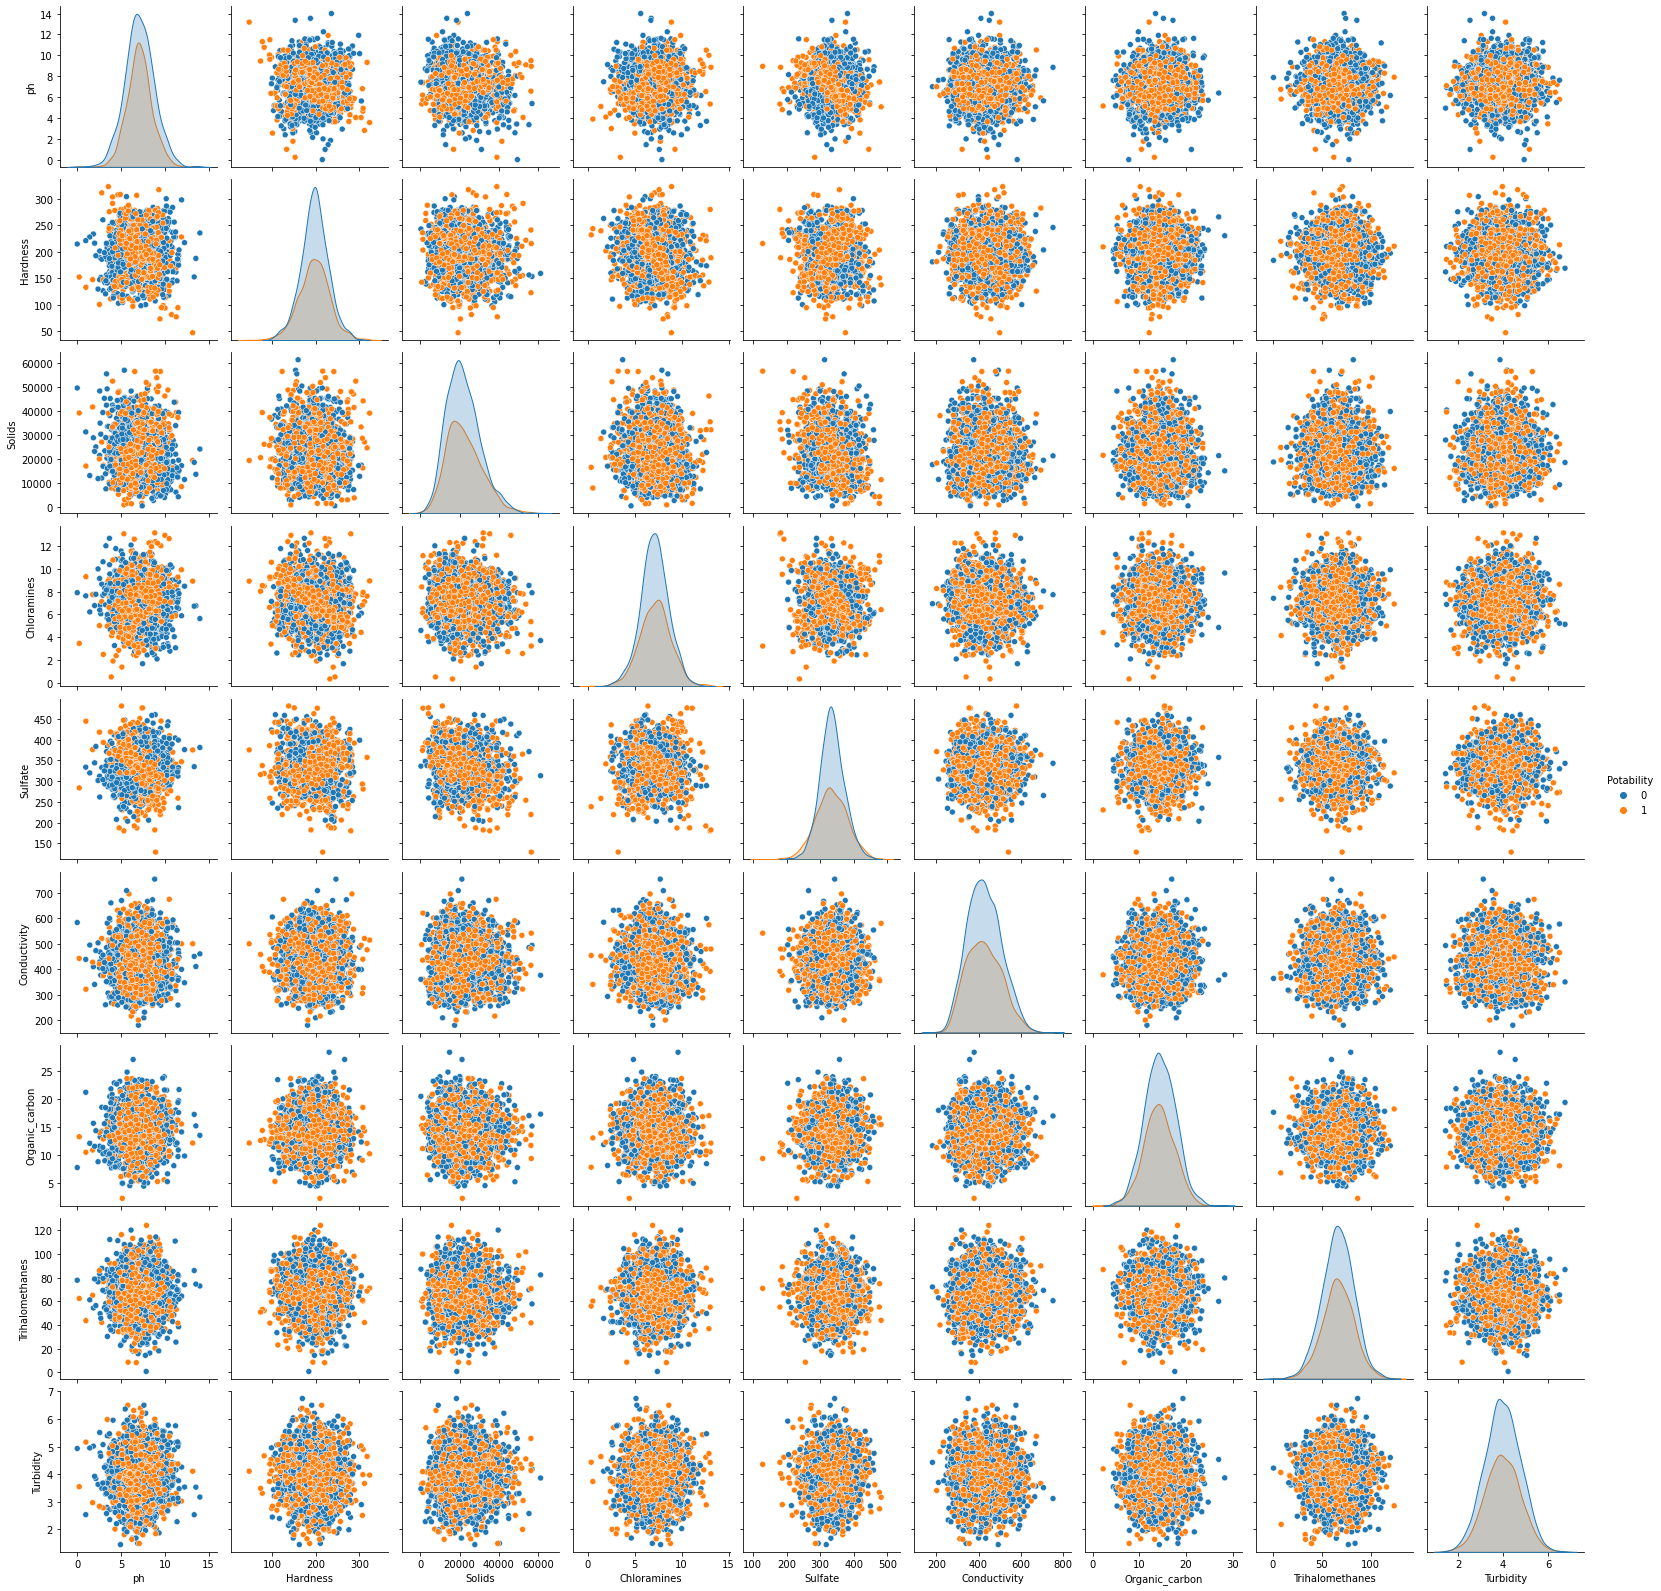

In [16]:
plt.figure(figsize=(16,10))
sns.pairplot(water, hue = 'Potability')
plt.show()

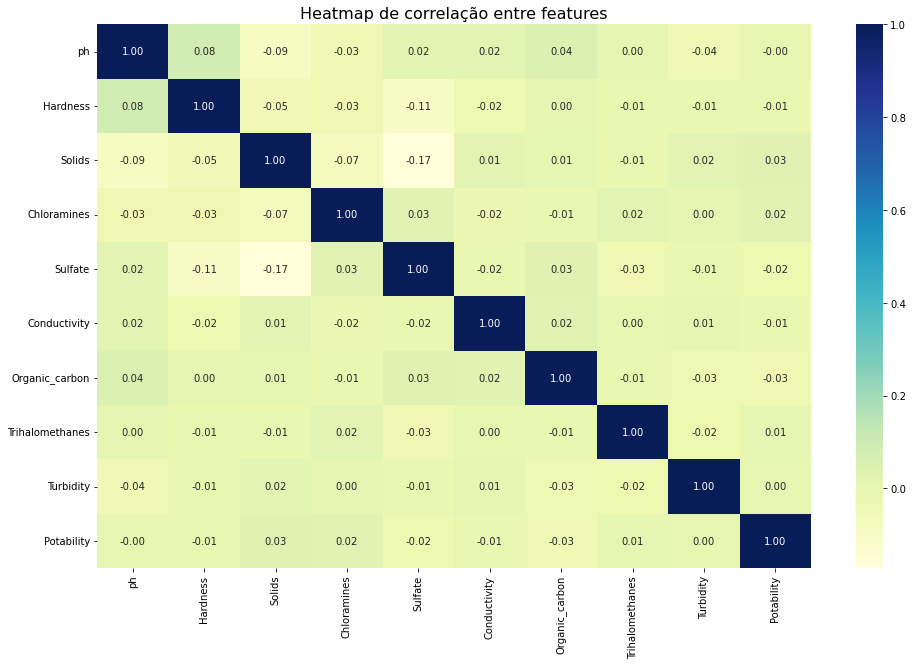

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(water.corr(), annot = True, fmt = '.2f', cmap = 'YlGnBu')
plt.title("Heatmap de correlação entre features", fontsize = 16)
plt.show()

* Nenhuma das variáveis físico químicas tem correlação significativa entre si ou com a variável target.
* As variáveis de turbidez e tds, apesar de estarem ligadas, não apresentam correlação.

In [18]:
scl    = StandardScaler()
transf = scl.fit_transform(X=water.drop('Potability', axis = 1))
water1 = pd.DataFrame(transf, columns = water.drop('Potability',axis=1).columns)
water1 = water1.assign(Potability = water.Potability)

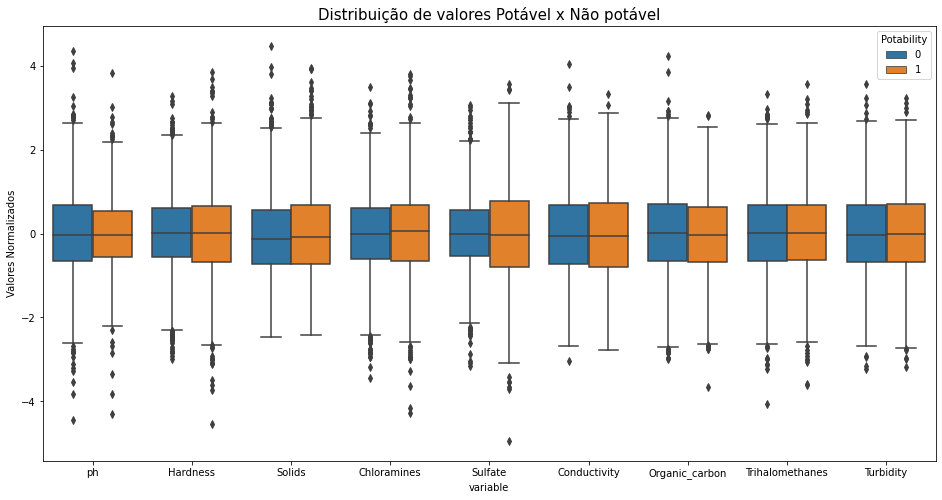

In [19]:
plt.figure(figsize = (16,8))
sns.boxplot(data = water1.melt(id_vars = 'Potability'), x='variable', y='value', hue = 'Potability')
plt.title('Distribuição de valores Potável x Não potável', fontsize=15)
plt.ylabel('Valores Normalizados')
plt.show()

As distribuições das amostras potáveis e não potáveis não parecem ser significativamente distintas.

# Modelagem

## Train-Test Split

In [20]:
X = water.drop('Potability', axis = 1)
y = water.Potability

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## Model Selection

In [24]:
#Cross-validation
scv = StratifiedKFold(n_splits = 5)

In [76]:
def model_selection():
    scores = []
    
    clfs = [LogisticRegression(), 
           SVC(), 
           DecisionTreeClassifier(), 
           ExtraTreeClassifier(), 
           RandomForestClassifier(), 
           AdaBoostClassifier(), 
           KNeighborsClassifier(), 
           GaussianNB(),
           GradientBoostingClassifier(),
           xgb.XGBClassifier(),
           xgb.XGBRFClassifier()]

    imputers = [SimpleImputer(strategy = 'mean'), 
                KNNImputer(n_neighbors = 5)]
    
    scalers  = [StandardScaler(), 
                MaxAbsScaler(), 
                MinMaxScaler()]
       
    
    for clf in clfs:
        for imputer in imputers:
            for scaler in scalers:
                steps = [[('imputer', imputer),
                          ('scaler', scaler),
                          ('model',clf)],

                         [('imputer', imputer),
                          ('smote', SMOTE(random_state = 42)),
                          ('scaler', scaler),
                          
                          ('model',clf)]]
                for smote, step in enumerate(steps):

                    pipe = imbpipeline(steps=step)

                    score = cross_validate(pipe, X_train, y_train, scoring = ['precision','f1'], cv = scv)
                    if smote:
                        scores.append([clf, scaler, imputer,score['test_precision'].mean(), score['test_f1'].mean(),True])
                    else:
                        scores.append([clf, scaler, imputer, score['test_precision'].mean(), score['test_f1'].mean(), False])            

    df = pd.DataFrame(scores, columns = ['Model','Scaler','Imputer','precision','f1', 'SMOTE'])
    
    return df.sort_values(by=['precision','f1'], ascending = False)

Partindo do pressuposto que é mais importante que não sejam vistas como potáveis as amostras que não são potáveis, a principal métrica de avaliação do modelo será a precisão, seguida pela avaliação da média harmônica F1 que balisa a precisão com o recall para entendermos como o modelo se comporta também em relação a essa última métrica.

In [77]:
rslt = model_selection()

In [78]:
rslt.head(10)

,Model,Scaler,Imputer,precision,f1,SMOTE
14,SVC(),MaxAbsScaler(),SimpleImputer(),0.728685,0.340395,False
20,SVC(),MaxAbsScaler(),KNNImputer(),0.714653,0.333255,False
12,SVC(),StandardScaler(),SimpleImputer(),0.713940,0.432188,False
16,SVC(),MinMaxScaler(),SimpleImputer(),0.700398,0.367895,False
18,SVC(),StandardScaler(),KNNImputer(),0.696920,0.409334,False
22,SVC(),MinMaxScaler(),KNNImputer(),0.695949,0.363164,False
120,"XGBRFClassifier(base_score=None, booster=None,...",StandardScaler(),SimpleImputer(),0.655203,0.330755,False
122,"XGBRFClassifier(base_score=None, booster=None,...",MaxAbsScaler(),SimpleImputer(),0.655203,0.330755,False
124,"XGBRFClassifier(base_score=None, booster=None,...",MinMaxScaler(),SimpleImputer(),0.655203,0.330755,False
52,RandomForestClassifier(),MinMaxScaler(),SimpleImputer(),0.644164,0.447548,False


In [74]:
def model_rank_graph(rslt):
    rslt['combo'] = rslt.apply(lambda x: f'{str(x.Model)}+{str(x.Scaler)}+{str(x.Imputer)}+{str(x.SMOTE)}', axis = 1)
    plt.figure(figsize = (20, 32))
    sns.barplot(x='precision',y='combo',orient = 'h', data = rslt)

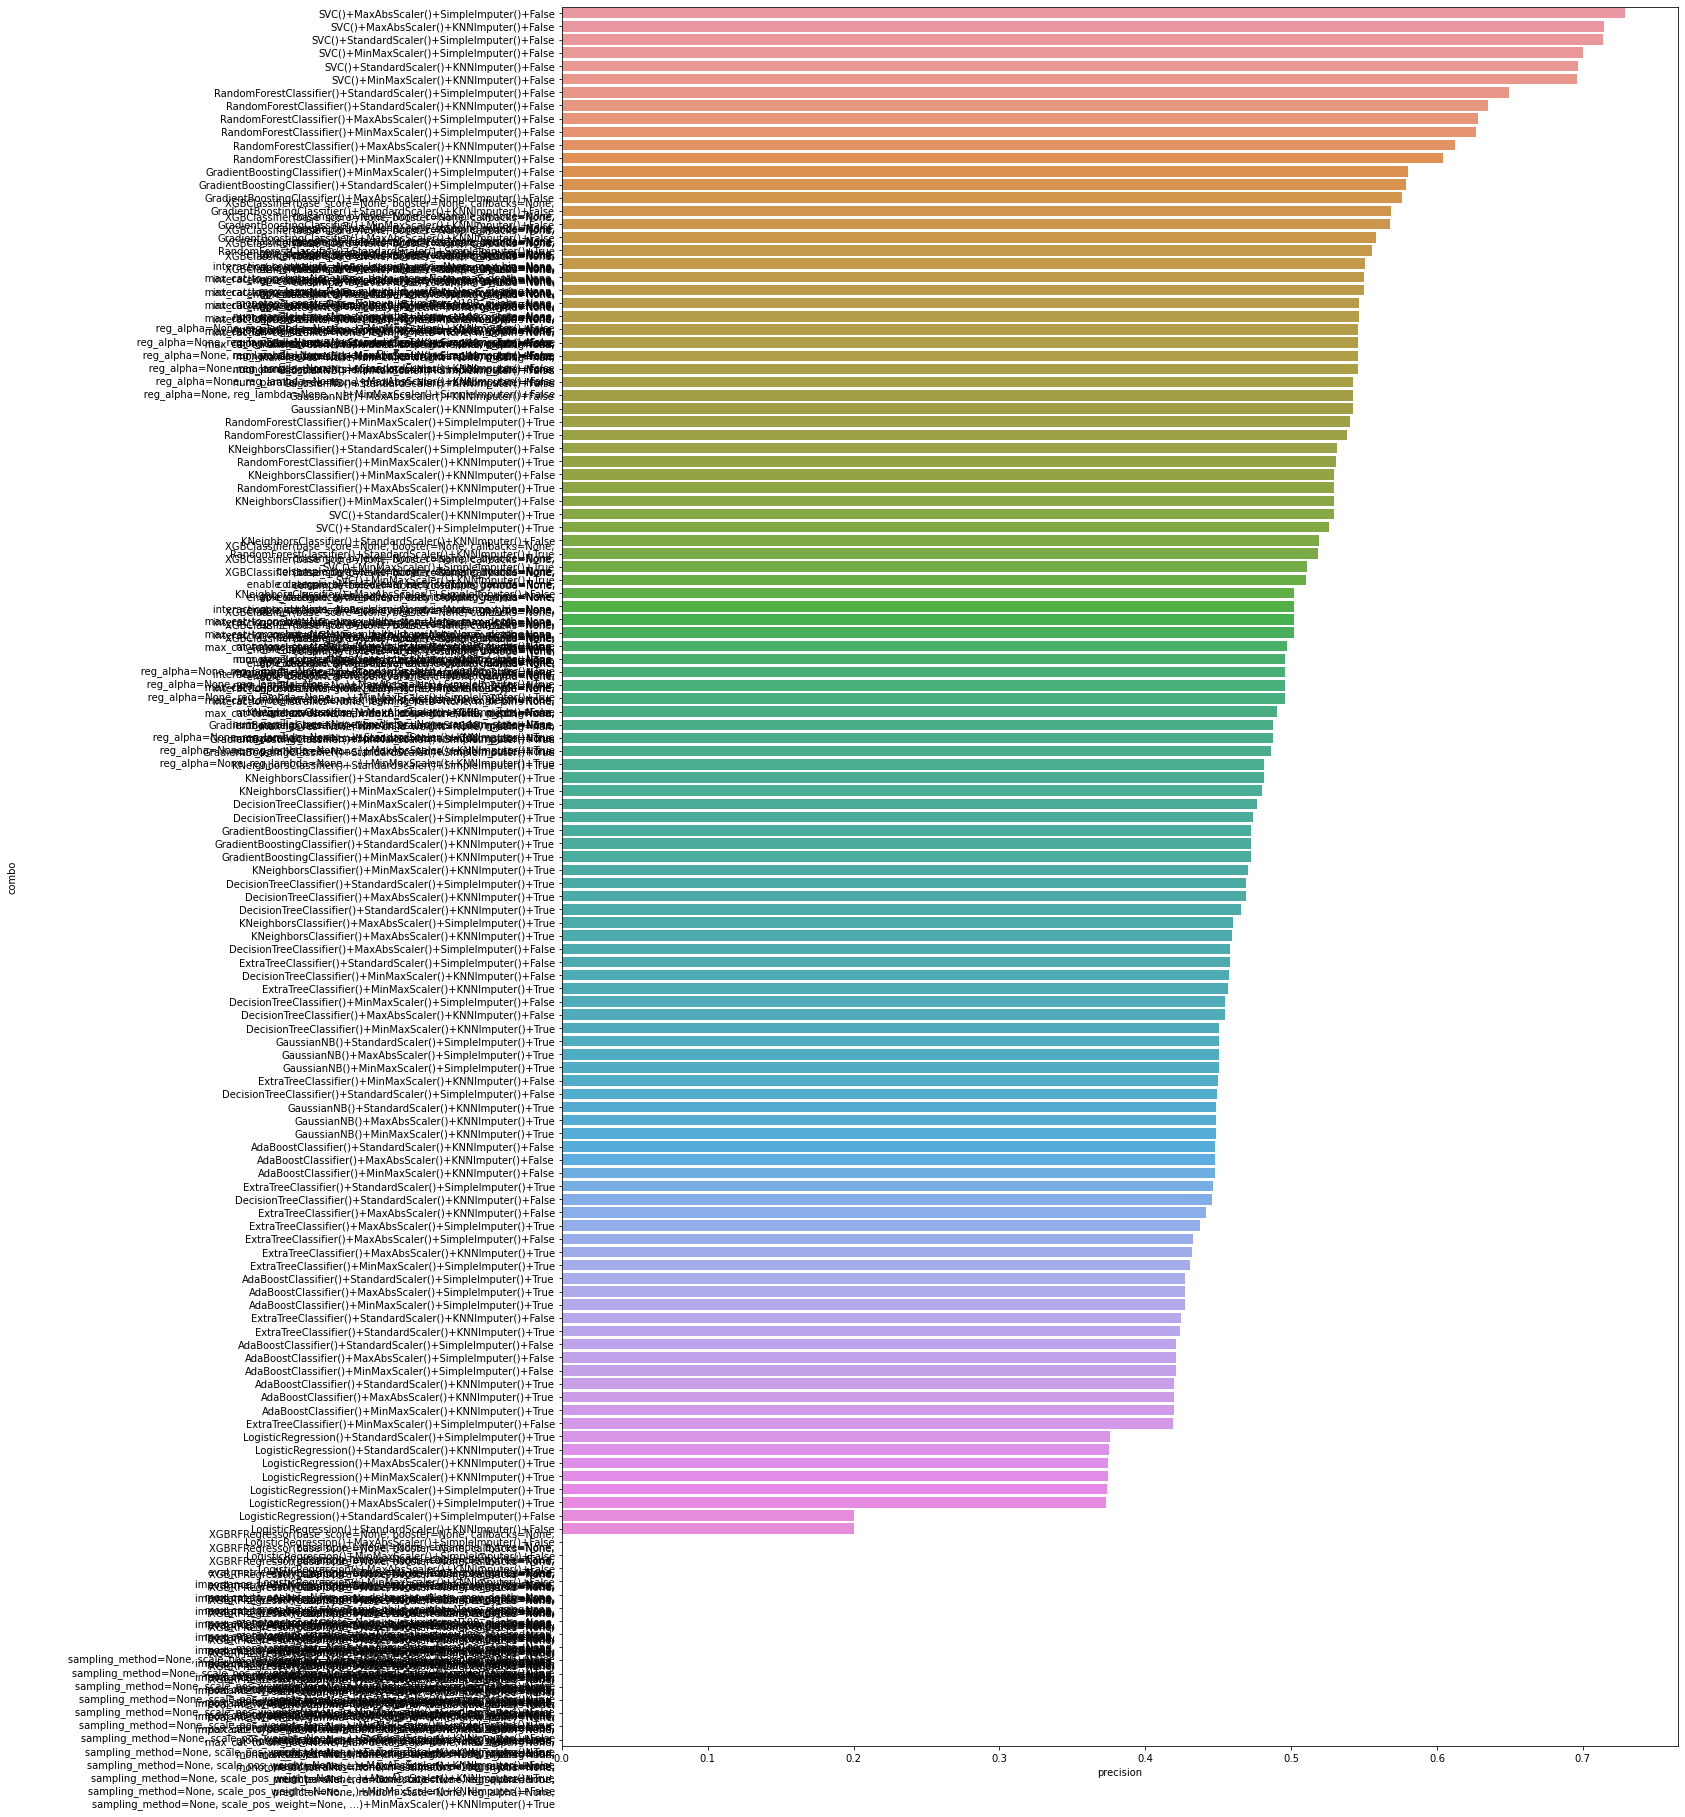

In [75]:
model_rank_graph(rslt)

O algoritmo SVC obteve os melhores resultados em relação à métrica de precisão. A técnica de SMOTING não parece ter contribuído com o resultado, não figurando em nenhuma combinação entre os 15+ pipes que melhor performaram em termos de precisão.

O terceiro melhor modelo em termos de precisão alcançou resultados semelhantes ao primeiro em termos de precisão e tem um salto de 9% na métrica f1 em relação ao mesmo, indo de 34% a 43% em relação ao mesmo. Portanto, será a combinação de modelo, imputer e scaler aplicados no pipeline final.

## Pipe pre-tuning

In [30]:
best_pipe = imbpipeline(steps = [('imputer',  SimpleImputer()),
                                 ('scaler', StandardScaler()),
                                 ('model', SVC())])

In [31]:
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', SVC())])

Apesar disso, a matriz de confusão aponta que há um grande número de amostras falsamente classificadas como não potáveis, o que indica um recall baixo.

In [32]:
scores  = cross_validate(best_pipe, X_train, y_train, scoring = ['accuracy','f1','precision','recall','roc_auc'], cv = scv)

In [33]:
# Verificando as demais métricas do modelo
print('Acurácia: ', round(scores['test_accuracy'].mean(),2)*100)
print('Recall: ', round(scores['test_recall'].mean(),2)*100)
print('Precision: ', round(scores['test_precision'].mean(),2)*100)
print('F1-SCORE: ',round(scores['test_f1'].mean(),2)*100)
print('AUC: ', round(scores['test_roc_auc'].mean(),2)*100)

Acurácia:  68.0
Recall:  31.0
Precision:  71.0
F1-SCORE:  43.0
AUC:  71.0


## Learning Curves

In [81]:
def plot_lc(pipe, scoring):
    lc = learning_curve(pipe, X_train, y_train, cv = scv, scoring = scoring)
    plt.figure(figsize=(7,4))
    sns.lineplot(x=lc[0], y=np.mean(lc[1], axis = 1), label = 'train', marker = "X")
    sns.lineplot(x=lc[0], y=np.mean(lc[2], axis = 1), label = 'validation', marker = 'X')
    plt.title(f'Learning Curves - {str(best_pipe.named_steps.model).split(sep="(")[0]}', fontsize = 12)
    plt.ylabel(scoring)
    plt.xlabel('Train Size')
    plt.legend()

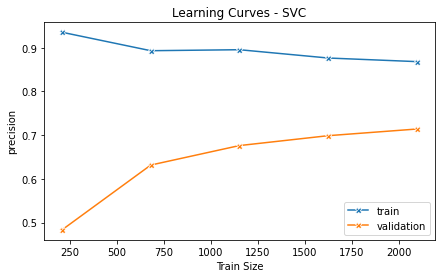

In [82]:
plot_lc(best_pipe, 'precision')

<p>As curvas de treino e validação apresentam uma diferença entre os resultados de precisão. Apesar disso, o gráfico parece indicar que caso houvesse mais de dados de treino, essa diferença entre as curvas seguiria diminuindo como vinha ocorrendo nos pontos outros tamanhos de conjunto de treino.</p>
<p> Portanto, uma opção para melhorar a performance do modelo, seria a aquisição de mais amostras.
    <p> Vamos agora avaliar se existem maneiras de melhorar os resultados através da tunagem dos hiperparametros do modelo.

## Hyperparameter Tuning

In [35]:
param_grid = {'model__kernel': ['rbf','linear','sigmoid','poly'],
              'model__class_weight': [{0:0.4, 1:1-0.4}, {0:0.5, 1:1-0.5}, {0:0.75, 1:1-0.75}],
              'imputer__strategy': ['median','mean'],
              'model__C': [0.1, 0.25,0.5,0.75,1]}

In [42]:
hsearch = GridSearchCV(best_pipe, param_grid = param_grid, cv = scv, scoring = 'precision')

In [59]:
hsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model', SVC())]),
             param_grid={'imputer__strategy': ['median', 'mean'],
                         'model__C': [0.1, 0.25, 0.5, 0.75, 1],
                         'model__class_weight': [{0: 0.4, 1: 0.6},
                                                 {0: 0.5, 1: 0.5},
                                                 {0: 0.75, 1: 0.25}],
                         'model__kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
             scoring='precision')

In [60]:
hsearch.best_params_, hsearch.best_score_

({'imputer__strategy': 'mean',
  'model__C': 0.5,
  'model__class_weight': {0: 0.5, 1: 0.5},
  'model__kernel': 'rbf'},
 0.7877645037061576)

Focando apenas na precisão, foi possível tunar o modelo para que alcance até aprox. 79% de precisão.

# Modelo final

In [46]:
new_best_pipe = imbpipeline(steps = [('imputer',  SimpleImputer(strategy = 'mean')),
                                     ('scaler', StandardScaler()),
                                     ('model', SVC(C = 0.5, class_weight = {0: 0.5, 1: 0.5}, kernel = 'rbf'))])

## Testagem final do modelo

In [49]:
scores  = cross_validate(new_best_pipe, X_train, y_train, scoring = ['accuracy','f1','precision','recall','roc_auc'], cv = scv)

In [61]:
print('Acurácia: ', round(scores['test_accuracy'].mean(),3)*100)
print('Recall: ', round(scores['test_recall'].mean(),3)*100)
print('Precision: ', round(scores['test_precision'].mean(),3)*100)
print('F1-SCORE: ',round(scores['test_f1'].mean(),3)*100)
print('AUC: ', round(scores['test_roc_auc'].mean(),3)*100)

Acurácia:  65.2
Recall:  14.7
Precision:  78.8
F1-SCORE:  24.7
AUC:  69.39999999999999


Por outro lado, o recall foi reduzido a apenas 15%. O que significa que boa parte das amostras potáveis seria descartada. Cabe avaliar qual seria a aplicação do modelo para definir se o parâmetro de precisão deve ser o priorizado.

In [51]:
new_best_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', SVC(C=0.5, class_weight={0: 0.5, 1: 0.5}))])

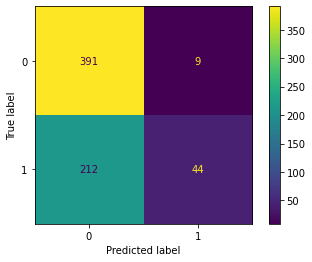

In [53]:
plot_confusion_matrix(new_best_pipe, X_test, y_test)

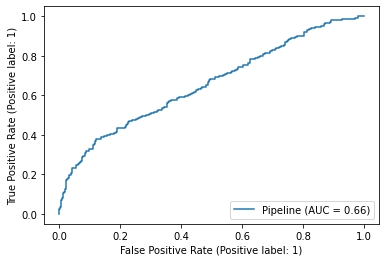

In [54]:
plot_roc_curve(new_best_pipe, X_test, y_test)

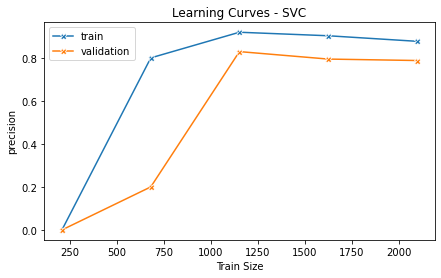

In [85]:
plot_lc(new_best_pipe, 'precision')

A tunagem dos hiperparametros diminuiu o gap de overfitting que antes aparecia no modelo.

In [103]:
y_pred = new_best_pipe.predict(X_test)
print('### AVALIAÇÃO FINAL DAS MÉTRICAS DO MODELO ###\n')

print(f'Precisão: {round(precision_score(y_test, y_pred),2)*100}%')
print(f'F1: {round(f1_score(y_test, y_pred),4)*100}%')

### AVALIAÇÃO FINAL DAS MÉTRICAS DO MODELO ###

Precisão: 83.0%
F1: 28.48%
